In [12]:
import numpy as np
from scipy.constants import h, c, k, Wien
import matplotlib.pyplot as plt

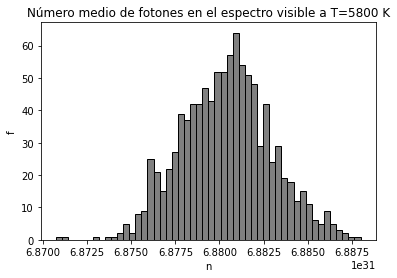

In [13]:
def B_lambda(T, lambda_):
    hck = h * c / k
    exp_term = np.exp(hck / (lambda_ * T))
    return (2 * h * c**2 / lambda_**5) * 1 / (exp_term - 1) #!No hay overflow en el exp

def number_of_photons_MC(T, num_samples=100000):
    lambda_min = 4e-7
    lambda_max = 7e-7

    lambda_values = np.random.uniform(lambda_min, lambda_max, size=num_samples)
    n_photons_values = B_lambda(T, lambda_values) / (h * c / lambda_values)

    visible_range = (lambda_values >= lambda_min) & (lambda_values <= lambda_max)
    visible_n_photons = n_photons_values[visible_range]

    mean_n_photons = np.mean(visible_n_photons)

    return mean_n_photons

temperature = 5800  # K
n_photons_values = [number_of_photons_MC(temperature) for i in range(1000)]

plt.hist(n_photons_values, bins=50, color="grey", ec="black")
plt.xlabel("n")
plt.ylabel("f")
plt.title(f"Número medio de fotones en el espectro visible a T={temperature} K")
plt.show()


<ipython-input-14-5d81e67e2dfc>:3: RuntimeWarning: overflow encountered in exp
  I = 2*h*c**2 / (lambda_samples**5 * (np.exp(h*c / (lambda_samples*k*T)) - 1)) #!Overflow en el exp???
c:\Users\JACKELINE\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


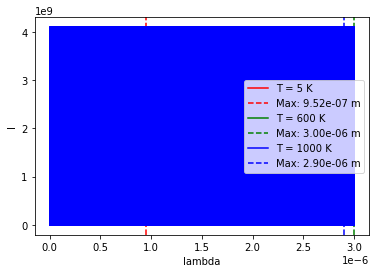

In [14]:
def monte_carlo_wien(T, num_samples=1000000):
    lambda_samples = np.random.uniform(1e-9, 3e-6, num_samples)
    I = 2*h*c**2 / (lambda_samples**5 * (np.exp(h*c / (lambda_samples*k*T)) - 1)) #!Overflow en el exp???
    lambda_max = lambda_samples[np.argmax(I)]
    return lambda_max, I

T_vals = [5,600,1000]

lambda_max_vals = []
I_vals = []
for T in T_vals:
    lambda_max, I = monte_carlo_wien(T)
    lambda_max_vals.append(lambda_max)
    I_vals.append(I)

fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for i, I in enumerate(I_vals):
    ax.plot(np.linspace(1e-9, 3e-6, len(I)), I, color=colors[i], label="T = {} K".format(T_vals[i]))
    ax.axvline(x=lambda_max_vals[i], color=colors[i], linestyle='--', label="Max: {:.2e} m".format(lambda_max_vals[i])) #!Color de las líneas

ax.set_xlabel("lambda")
ax.set_ylabel("I")
ax.legend()
plt.show()